In [1]:
import math

def draw_star(vertices, inner_radius, outer_radius, center):
    angle = 360 / vertices
    points = []

    for i in range(vertices * 2):
        radius = inner_radius if i % 2 == 0 else outer_radius
        x = center[0] + radius * math.cos(math.radians(i * angle))
        y = center[1] + radius * math.sin(math.radians(i * angle))
        points.append((int(x), int(y)))
    return points


# Define star parameters
vertices = 5  # Change the number of vertices as needed
inner_radius = 1
outer_radius = 4
center = 0,0


draw_star(vertices, inner_radius, outer_radius, center)


[(1, 0),
 (1, 3),
 (0, 0),
 (-3, -2),
 (0, 0),
 (4, 0),
 (0, 0),
 (-3, 2),
 (0, 0),
 (1, -3)]

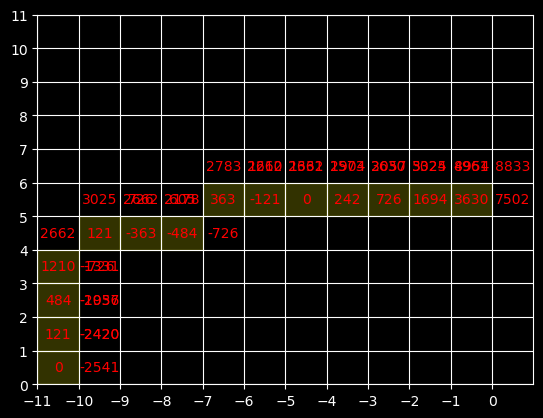

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_values(prev, a, b, x, y):
    values = [prev + (2 * x + 1) * b**2, 
              prev + (2 * y + 1) * a**2, 
              prev + (2 * x + 1) * b**2 + (2 * y + 1) * a**2]
    return values


def plot_grid(a, b):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(-a, 1, 1))
    ax.set_yticks(np.arange(0, b + 1, 1))
    x, y = -a, 0
    error = 0
    ax.text(x + .5, y + 0.5, 0, ha='center', va='center', color='red', fontsize=10)

    while True:
            ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color='yellow', alpha=0.2))
            cell_value = calculate_values(error, a, b, x, y)

            min_index = np.argmin(np.abs(cell_value))

            ax.text(x + 1.5, y + 0.5, str(cell_value[0]), ha='center', va='center', color='red', fontsize=10)
            ax.text(x + .5, y + 1.5, str(cell_value[1]), ha='center', va='center', color='red', fontsize=10)
            ax.text(x + 1.5, y + 1.5, str(cell_value[2]), ha='center', va='center', color='red', fontsize=10)

            if min_index == 0:
                x += 1
                error += cell_value[0]
            elif min_index == 1:
                y += 1
                error += cell_value[1]
            else:
                x += 1
                y += 1
                error += cell_value[2]
            if x == 0 or y == b:
                break

    plt.grid(True)
    plt.show()

# Example usage with a=3, b=3
plot_grid(11,11)


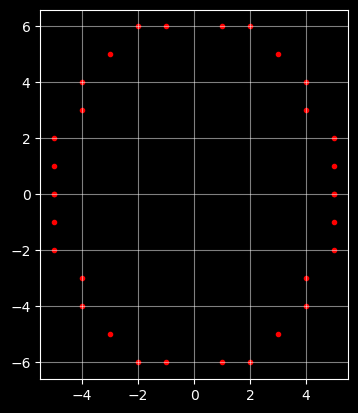

In [4]:
import matplotlib.pyplot as plt

def setPixel(x, y):
    plt.scatter(x, y, color='r', marker='.')

def plotEllipse(xm, ym, a, b):
    x = -a
    y = 0
    e2 = b**2
    err = x * (2 * e2 + x) + e2

    while x < 0:
        setPixel(xm - x, ym + y)  # I. Quadrant
        setPixel(xm + x, ym + y)  # II. Quadrant
        setPixel(xm + x, ym - y)  # III. Quadrant
        setPixel(xm - x, ym - y)  # IV. Quadrant

        e2 = 2 * err

        if e2 >= (x * 2 + 1) * b**2:
            err += (x * 2 + 1) * b**2
            x += 1

        if e2 <= (y * 2 + 1) * a**2:
            err += (y * 2 + 1) * a**2
            y += 1

    while y < b:
        print(xm, ym + y)
        setPixel(xm, ym + y)  # Finish tip of ellipse
        setPixel(xm, ym - y)
        y += 1

# Example usage with center at (0, 0), semi-major axis a=5, semi-minor axis b=3
plotEllipse(0, 0, 5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, alpha=0.5)

plt.show()
